In [12]:
from Gemini.GeminiPredict import GeminiPredict
from Generation.Equation_BaseDataset import Equation, BaseDataset
import Postprocessing.SOE_EquationGraph 
from Scraping.Scraper import Scraper

import os
import google.generativeai as genai
from sympy import *
import pandas as pd
import importlib

# Main

In [3]:
# 1. Scraping journal data
doi = "10.1016/j.jmatprotec.2017.04.005"
elsevier_api_key = os.getenv("ELSEVIER_API_KEY")
scraper = Scraper(doi, elsevier_api_key)
mathml_dict, const_dict = scraper.scrape()

# print(mathml_dict, const_dict)
print(const_dict)

# 2. Equation translation
gemini_api_key = os.getenv("GEMINI_API_KEY")   
model_name = "tunedModels/mmltopython4-f3fuppiemnq9"
predictor = GeminiPredict(gemini_api_key, model_name)
mathml_equations = list(mathml_dict.values())
print(type(mathml_equations[2]))
full_equations = predictor.generate_predictions(mml_list=mathml_equations)

print(full_equations)

# # 3. Solving system of equations
# column_names = ["P", "h"]
# p20_df = pd.read_csv("Data/p20.csv", header=None, names=column_names)
# P_list = pd.to_numeric(p20_df["P"]).tolist()
# h_list_ref = pd.to_numeric(p20_df["h"]).tolist()
# solver = SystemOfEquations(equations=full_equations)
# sympy_equations = solver.get_sympy_equations()
# print(solver.eq)
# # symbs = soe.reduce_symbols(const_dict)
# # print(symbs)

Request successful 

{'k_s (kW/mK)': 0.14, 'k_t (H13)': 0.0244, 'k_t (Cast iron)': 0.044, 'k_t (P20)': 0.0315, 'k_l (Lubricant)': 0.024, 'R_s (m)': 3.4e-07, 'R_t (H13)': 9.8e-07, 'R_t (Cast iron)': 8.1e-07, 'R_t (P20)': 9.6e-07, 'h_a (kW/m2K)': 0.8, 'σ_U (MPa)': 21.0, 'α (−)': 0.000201, 'λ (−)': 6.05, 'β (−)': 0.00011, 'γ (m−1)': 200000.0}
API key loaded successfully!
<class 'str'>


Generating Predictions:  46%|████▌     | 6/13 [00:07<00:08,  1.28s/row]


KeyboardInterrupt: 

### Scraping

In [5]:
doi = "10.1016/j.jmatprotec.2017.04.005"
elsevier_api_key = os.getenv("ELSEVIER_API_KEY")
scraper = Scraper(doi, elsevier_api_key)
mathml_dict, const_dict = scraper.scrape()
print(mathml_dict)
print(scraper.soup)

Request successful 

{}
<html><body><full-text-retrieval-response xmlns="http://www.elsevier.com/xml/svapi/article/dtd" xmlns:bk="http://www.elsevier.com/xml/bk/dtd" xmlns:cals="http://www.elsevier.com/xml/common/cals/dtd" xmlns:ce="http://www.elsevier.com/xml/common/dtd" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:dcterms="http://purl.org/dc/terms/" xmlns:ja="http://www.elsevier.com/xml/ja/dtd" xmlns:mml="http://www.w3.org/1998/Math/MathML" xmlns:prism="http://prismstandard.org/namespaces/basic/2.0/" xmlns:sa="http://www.elsevier.com/xml/common/struct-aff/dtd" xmlns:sb="http://www.elsevier.com/xml/common/struct-bib/dtd" xmlns:tb="http://www.elsevier.com/xml/common/table/dtd" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xocs="http://www.elsevier.com/xml/xocs/dtd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"><coredata><prism:url>https://api.elsevier.com/content/article/pii/S0924013617301334</prism:url><dc:identifier>doi:10.1016/j.jmatprotec.2017.04.005</dc:identifier>

### Gemini

In [10]:
gemini_api_key = os.getenv("GEMINI_API_KEY")
# model_name = "models/gemini-1.5-flash"
model_name = "tunedModels/mmltopython4-f3fuppiemnq9"
predictor = GeminiPredict(gemini_api_key, model_name)
mathml_equations = list(mathml_dict.values())
i = 2
eq = str(mathml_equations[i])
print(type(eq))
# text = predictor.predict('<mml:mrow>\n<mml:mi>h</mml:mi>\n<mml:mo>=</mml:mo>\n<mml:mfrac>\n<mml:mrow>\n<mml:mn>1</mml:mn>\n<mml:mo>−</mml:mo>\n<mml:mi>A</mml:mi>\n</mml:mrow>\n<mml:mrow>\n<mml:msub>\n<mml:mi>h</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n</mml:mrow>\n</mml:mfrac>\n<mml:mfrac>\n<mml:mrow>\n<mml:mn>2</mml:mn>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>t</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>w</mml:mi>\n</mml:msub>\n</mml:mrow>\n<mml:mrow>\n<mml:mn>2</mml:mn>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>t</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>w</mml:mi>\n</mml:msub>\n<mml:mo>−</mml:mo>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>w</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n<mml:mo>−</mml:mo>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>f</mml:mi>\n</mml:msub>\n<mml:msub>\n<mml:mi>k</mml:mi>\n<mml:mi>t</mml:mi>\n</mml:msub>\n</mml:mrow>\n</mml:mfrac>\n</mml:mrow>')
text = predictor.predict(eq)
print(text)

API key loaded successfully!
<class 'str'>
h = Symbol('h')
λ = Symbol('λ')
p = Symbol('p')
C = Symbol('C')
σ_U = Symbol('σ_U')
K = Symbol('K')
e = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)


In [3]:
full_equations = ["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_t**(-1)))", "R = Symbol('R')\nR_s = Symbol('R_s')\nR_t = Symbol('R_t')\ne = Eq(R, sqrt(R_s**2 + R_t**2))", "N_P = Symbol('N_P')\nλ = Symbol('λ')\nP = Symbol('P')\nσ_U = Symbol('σ_U')\ne = Eq(N_P, 1 - exp(-λ*P/σ_U))", "h_l = Symbol('h_l')\nβ = Symbol('β')\nK_stl = Symbol('K_stl')\nN_L = Symbol('N_L')\nR = Symbol('R')\ne = Eq(h_l, β*K_stl*N_L/R)", "K_stl = Symbol('K_stl')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\nk_l = Symbol('k_l')\ne = Eq(K_stl, 3/(k_s**(-1) + k_t**(-1) + k_l**(-1)))", "N_L = Symbol('N_L')\nγ = Symbol('γ')\nδ = Symbol('δ')\ne = Eq(N_L, 1 - exp(-γ*δ))"]

### Generation

In [4]:
eq = Equation()
py, mml = eq.generate()
print(repr(py))


"I = Symbol('I')\nx = Symbol('x')\ny_τ = Symbol('y_τ')\nΣ = Symbol('Σ')\nB = Symbol('B')\ne = Eq(I, -exp(Σ/4)**(sqrt(y_τ**x)) + tan(B))"


In [3]:
import csv
class GeminiDataset(BaseDataset):
    def __init__(self, num, filepath):
        super().__init__(num, filepath)

    def get_columns(self):
        return ["text_input", "output"]
    
gd = GeminiDataset(5, "Data/gemini_test_6.csv")
gd.create()


Generating dataset: 100%|██████████| 5/5 [00:00<00:00, 84.53it/s]

Τ = Symbol('Τ')
ζ = Symbol('ζ')
l_Π = Symbol('l_Π')
δ_a = Symbol('δ_a')
e = Eq(Τ, sqrt(ζ) + cos(l_Π - δ_a))
Ψ = Symbol('Ψ')
α = Symbol('α')
Ψ_xqχ = Symbol('Ψ_xqχ')
e = Eq(Ψ, sqrt(α) - cos(Ψ_xqχ) + 7)
Μ = Symbol('Μ')
H = Symbol('H')
m_Ψ = Symbol('m_Ψ')
Z = Symbol('Z')
b = Symbol('b')
e = Eq(Μ, sqrt(-H + m_Ψ)*exp(b)**Z)
Ξ_c = Symbol('Ξ_c')
Υ = Symbol('Υ')
Σ_ο = Symbol('Σ_ο')
e = Eq(Ξ_c, -exp(Υ) + cos(Σ_ο))
A_σm = Symbol('A_σm')
Θ = Symbol('Θ')
χ_Χμ = Symbol('χ_Χμ')
G_μ = Symbol('G_μ')
φ = Symbol('φ')
e = Eq(A_σm, G_μ**(sin(Θ + χ_Χμ)/2)/log(φ))


### Postprocessing

In [17]:
importlib.reload(Postprocessing.SOE_EquationGraph)
from Postprocessing.SOE_EquationGraph import SystemOfEquations, EquationGraph

In [3]:
full_equations = ["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_t**(-1)))", "R = Symbol('R')\nR_s = Symbol('R_s')\nR_t = Symbol('R_t')\ne = Eq(R, sqrt(R_s**2 + R_t**2))", "N_P = Symbol('N_P')\nλ = Symbol('λ')\nP = Symbol('P')\nσ_U = Symbol('σ_U')\ne = Eq(N_P, 1 - exp(-λ*P/σ_U))", "h_l = Symbol('h_l')\nβ = Symbol('β')\nK_stl = Symbol('K_stl')\nN_L = Symbol('N_L')\nR = Symbol('R')\ne = Eq(h_l, β*K_stl*N_L/R)", "K_stl = Symbol('K_stl')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\nk_l = Symbol('k_l')\ne = Eq(K_stl, 3/(k_s**(-1) + k_t**(-1) + k_l**(-1)))", "N_L = Symbol('N_L')\nγ = Symbol('γ')\nδ = Symbol('δ')\ne = Eq(N_L, 1 - exp(-γ*δ))"]
const_dict = {'k_s (kW/mK)': 0.14, 'k_t (H13)': 0.0244, 'k_t (Cast iron)': 0.044, 'k_t (P20)': 0.0315, 'k_l (Lubricant)': 0.024, 'R_s (m)': 3.4e-07, 'R_t (H13)': 9.8e-07, 'R_t (Cast iron)': 8.1e-07, 'R_t (P20)': 9.6e-07, 'h_a (kW/m2K)': 0.8, 'σ_U (MPa)': 21.0, 'α (−)': 0.000201, 'λ (−)': 6.05, 'β (−)': 0.00011, 'γ (m−1)': 200000.0}
solver = SystemOfEquations(equations=full_equations)
sympy_equations = solver.reduce_system(6, const_dict)
print(sympy_equations)

KeyError: P

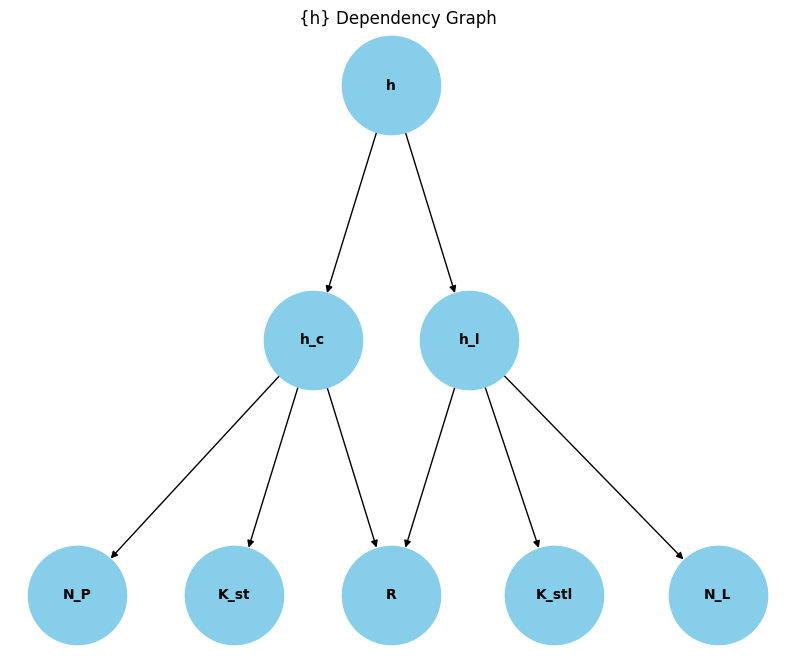

now


In [18]:
# Constants
k_s = 0.14
k_t = 0.0315
k_l = 0.024
Rs = 3.4e-07
Rt = 9.6e-07
h_a = 0.8
σ_U = 21.0
α = 0.000201
λ = 6.05
β = 0.00011
γ = 200000.0
δ = 1.5e-5
P = 1

k = 1
p = 1
H = 1
θ = 1
σ = 1
K = 1
C = 1
A = 1
B = 1
k_f = 1
k_w = 1
h_f = 1
h_g = 1

# Variables
h = Symbol("h")
h_c = Symbol("h_c")
K_st = Symbol("K_st")
R = Symbol("R")
N_P = Symbol("N_P")
h_l = Symbol("h_l")
K_stl = Symbol("K_stl")
N_L = Symbol("N_L")

exprs = [Eq(h, h_c + h_g), 
            Eq(h, 1.45*k*(p/H)**0.985*tan(θ)/σ), 
            Eq(h, 8000*λ*(K*p/(C*σ_U))**0.86), 
            Eq(h, A*(1 - exp(-B*P))), 
            Eq(h, 2*k_f*k_t*k_w*(1 - A)/(h_f*(-k_f*k_t - k_f*k_w + 2*k_t*k_w))), 
            Eq(h, h_a + h_c + h_l), 
            Eq(h_c, K_st*N_P*α/R), 
            Eq(K_st, 2/(1/k_t + 1/k_s)), 
            Eq(R, sqrt(Rs**2 + Rt**2)), 
            Eq(N_P, 1 - exp(-P*λ/σ_U)), 
            Eq(h_l, K_stl*N_L*β/R), 
            Eq(K_stl, 3/(1/k_t + 1/k_s + 1/k_l)), 
            Eq(N_L, 1 - exp(-γ*δ))]
# full_equations = ["h = Symbol('h')\nh_g = Symbol('h_g')\nh_c = Symbol('h_c')\ne = Eq(h, h_g + h_c)", "h = Symbol('h')\nk = Symbol('k')\nθ = Symbol('θ')\nσ = Symbol('σ')\np = Symbol('p')\nH = Symbol('H')\ne = Eq(h, 1.45*k*tan(θ)/σ*(p/H)**0.985)", "h = Symbol('h')\nλ = Symbol('λ')\np = Symbol('p')\nC = Symbol('C')\nσ_U = Symbol('σ_U')\nK = Symbol('K')\ne = Eq(h, 8000*λ*(p/(C*σ_U)*K)**0.86)", "h = Symbol('h')\nA = Symbol('A')\nB = Symbol('B')\nP = Symbol('P')\ne = Eq(h, A*(1 - exp(-B*P)))", "h = Symbol('h')\nA = Symbol('A')\nh_f = Symbol('h_f')\nk_f = Symbol('k_f')\nk_t = Symbol('k_t')\nk_w = Symbol('k_w')\ne = Eq(h, (1 - A)/h_f*2*k_f*k_t*k_w/(2*k_t*k_w - k_w*k_f - k_f*k_t))", "h = Symbol('h')\nh_a = Symbol('h_a')\nh_c = Symbol('h_c')\nh_l = Symbol('h_l')\ne = Eq(h, h_a + h_c + h_l)", "h_c = Symbol('h_c')\nα = Symbol('α')\nK_st = Symbol('K_st')\nN_P = Symbol('N_P')\nR = Symbol('R')\ne = Eq(h_c, α*K_st*N_P/R)", "K_st = Symbol('K_st')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\ne = Eq(K_st, 2/(k_s**(-1) + k_t**(-1)))", "R = Symbol('R')\nR_s = Symbol('R_s')\nR_t = Symbol('R_t')\ne = Eq(R, sqrt(R_s**2 + R_t**2))", "N_P = Symbol('N_P')\nλ = Symbol('λ')\nP = Symbol('P')\nσ_U = Symbol('σ_U')\ne = Eq(N_P, 1 - exp(-λ*P/σ_U))", "h_l = Symbol('h_l')\nβ = Symbol('β')\nK_stl = Symbol('K_stl')\nN_L = Symbol('N_L')\nR = Symbol('R')\ne = Eq(h_l, β*K_stl*N_L/R)", "K_stl = Symbol('K_stl')\nk_s = Symbol('k_s')\nk_t = Symbol('k_t')\nk_l = Symbol('k_l')\ne = Eq(K_stl, 3/(k_s**(-1) + k_t**(-1) + k_l**(-1)))", "N_L = Symbol('N_L')\nγ = Symbol('γ')\nδ = Symbol('δ')\ne = Eq(N_L, 1 - exp(-γ*δ))"]
# exprs = [sympify(eq) for eq in full_equations]
eg = EquationGraph(exprs, 6)
system = eg.get_system_of_equations()
eg.plot_graph()

Generating Curve: 100%|██████████| 101/101 [00:21<00:00,  4.70it/s]


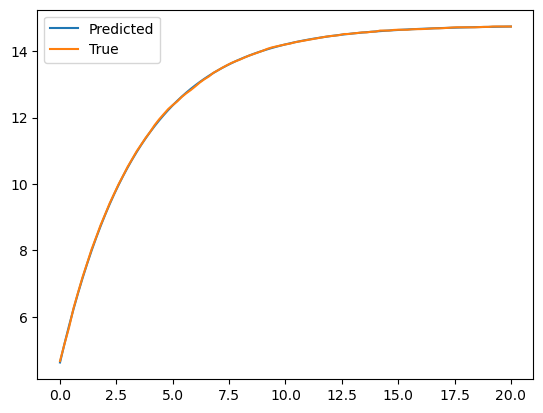

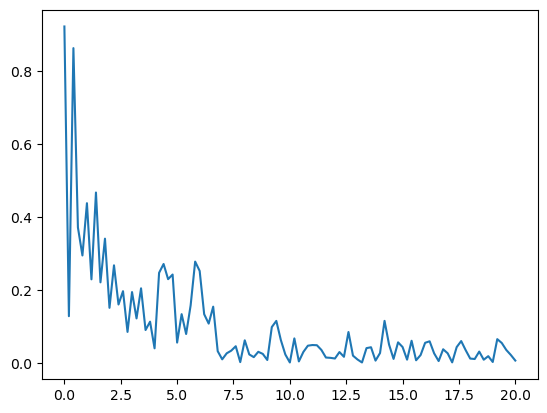

In [7]:
h=Symbol("h")
exprs = [1]
column_name = ["P", "h"]
p20_df = pd.read_csv("Data/p20.csv", header=None, names=column_name)
P_list = pd.to_numeric(p20_df["P"]).tolist()
h_list_ref = pd.to_numeric(p20_df["h"]).tolist()
soe = SystemOfEquations(filepath="Data/HTC_gemini5_predictions.txt")

solutions = soe.solve_system(exprs, P_list, h)
soe.plot_graph(P_list, solutions, h_list_ref)
soe.plot_error_graph(P_list, solutions, h_list_ref)